In [116]:
import requests
from PIL import Image 
from io import BytesIO

In [117]:
def download_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)) #bytesio helps converting image in binary
    return img

In [118]:
im1 = download_img("https://img.freepik.com/free-vector/sunset-sky-with-sun-peek-out-fluffy-clouds_107791-1996.jpg?w=2000 ")
im1.save('image.png')

In [119]:
im2 = Image.open(r"C:\Users\asus\Pictures\19726073f3191d081bf16abf420ad0cb.jpg")#r is for raw string for slashes to not behave as special characters 
im2.size

(1296, 1936)

In [120]:
im1.show()

In [121]:
im2.show()

In [122]:
im1.info

{'jfif': 257,
 'jfif_version': (1, 1),
 'jfif_unit': 2,
 'jfif_density': (37, 37),
 'progressive': 1,
 'progression': 1}

In [123]:
im1.mode #RGB

'RGB'

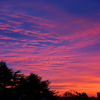

In [124]:
im2.resize((100,100))

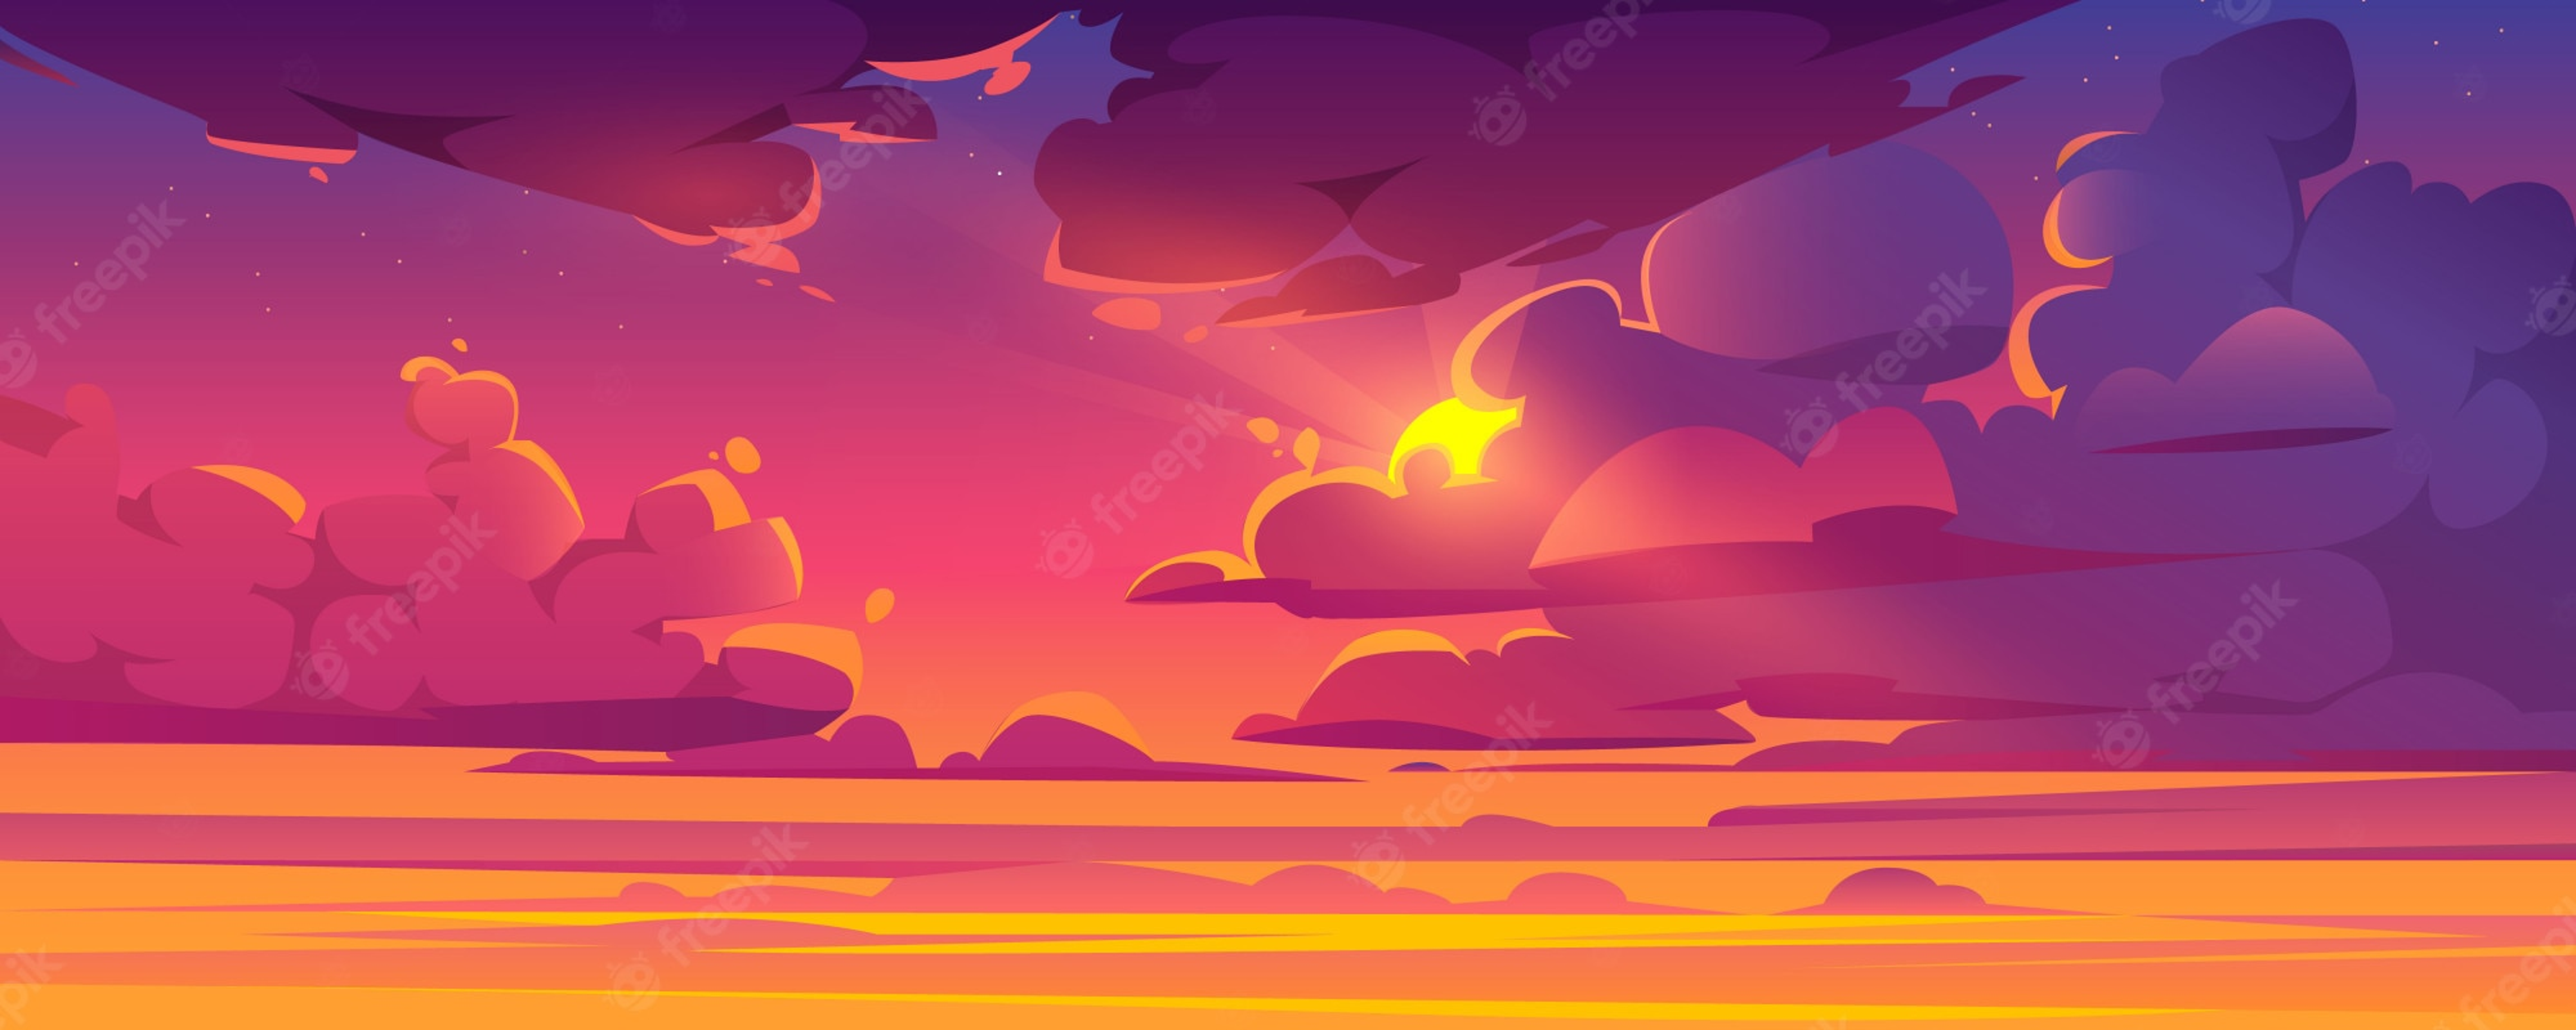

In [125]:
im1.resize((3*im1.width , 3*im1.height))

In [126]:
im2.resize((im2.width//3 , im2.height//3)).save("image1.png")

In [127]:
from PIL import ImageDraw , ImageFont

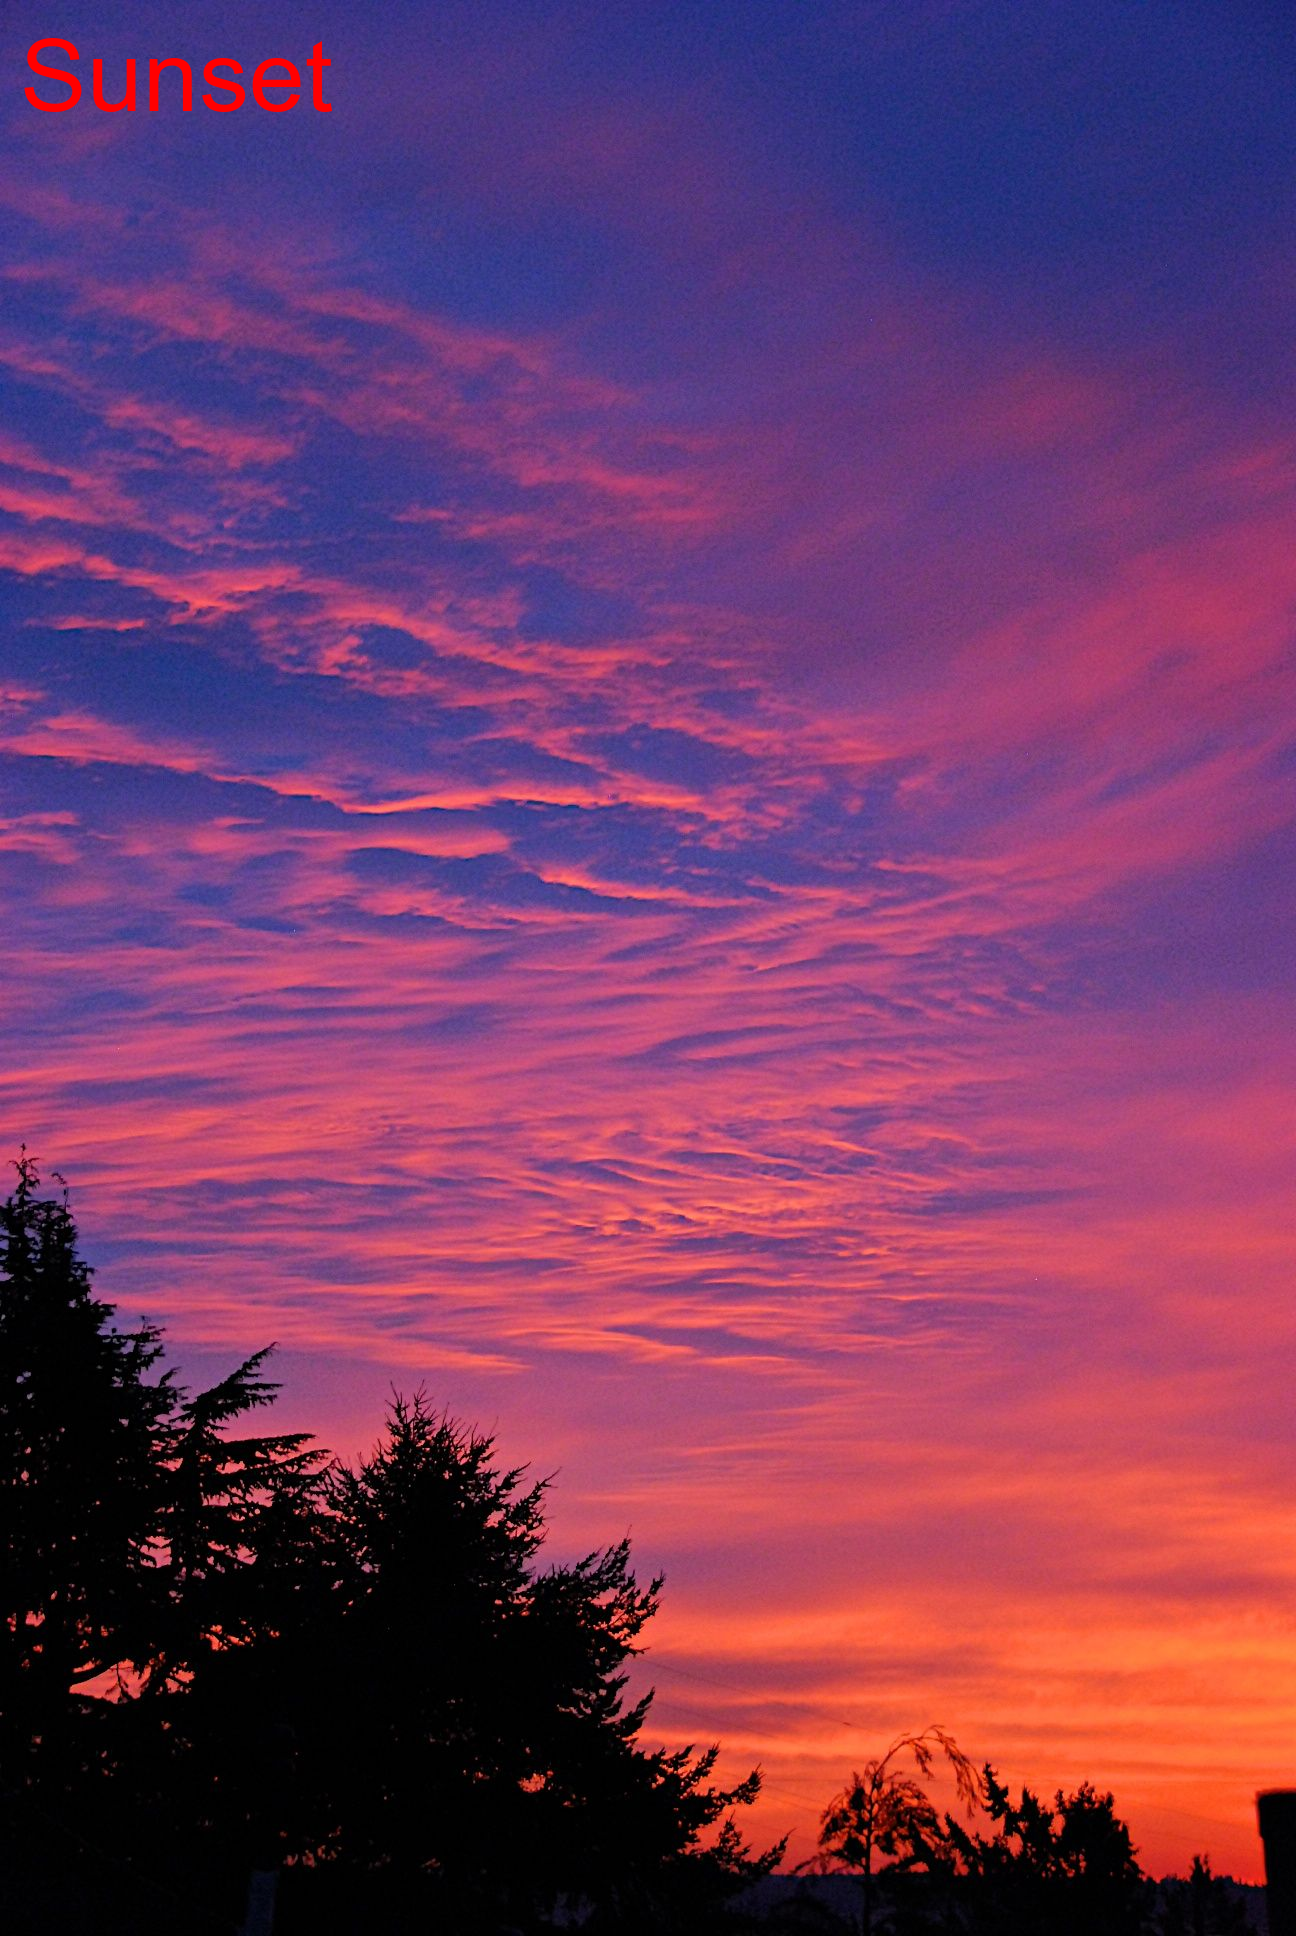

In [128]:
drwIm2 = ImageDraw.Draw(im2)
drwIm2.text((20,20) , 'Sunset' , fill = 'red' , font = ImageFont.truetype('arial.ttf',100))
im2

In [129]:
im2.show()

In [130]:
im1.rotate(90)
im2.rotate(30 , expand = True , fillcolor = 'blue').save('sunset02.png')

C:\Users\asus\AppData\Local\Temp\ipykernel_19604\2337035928.py:2: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  im1.transpose(Image.FLIP_LEFT_RIGHT)


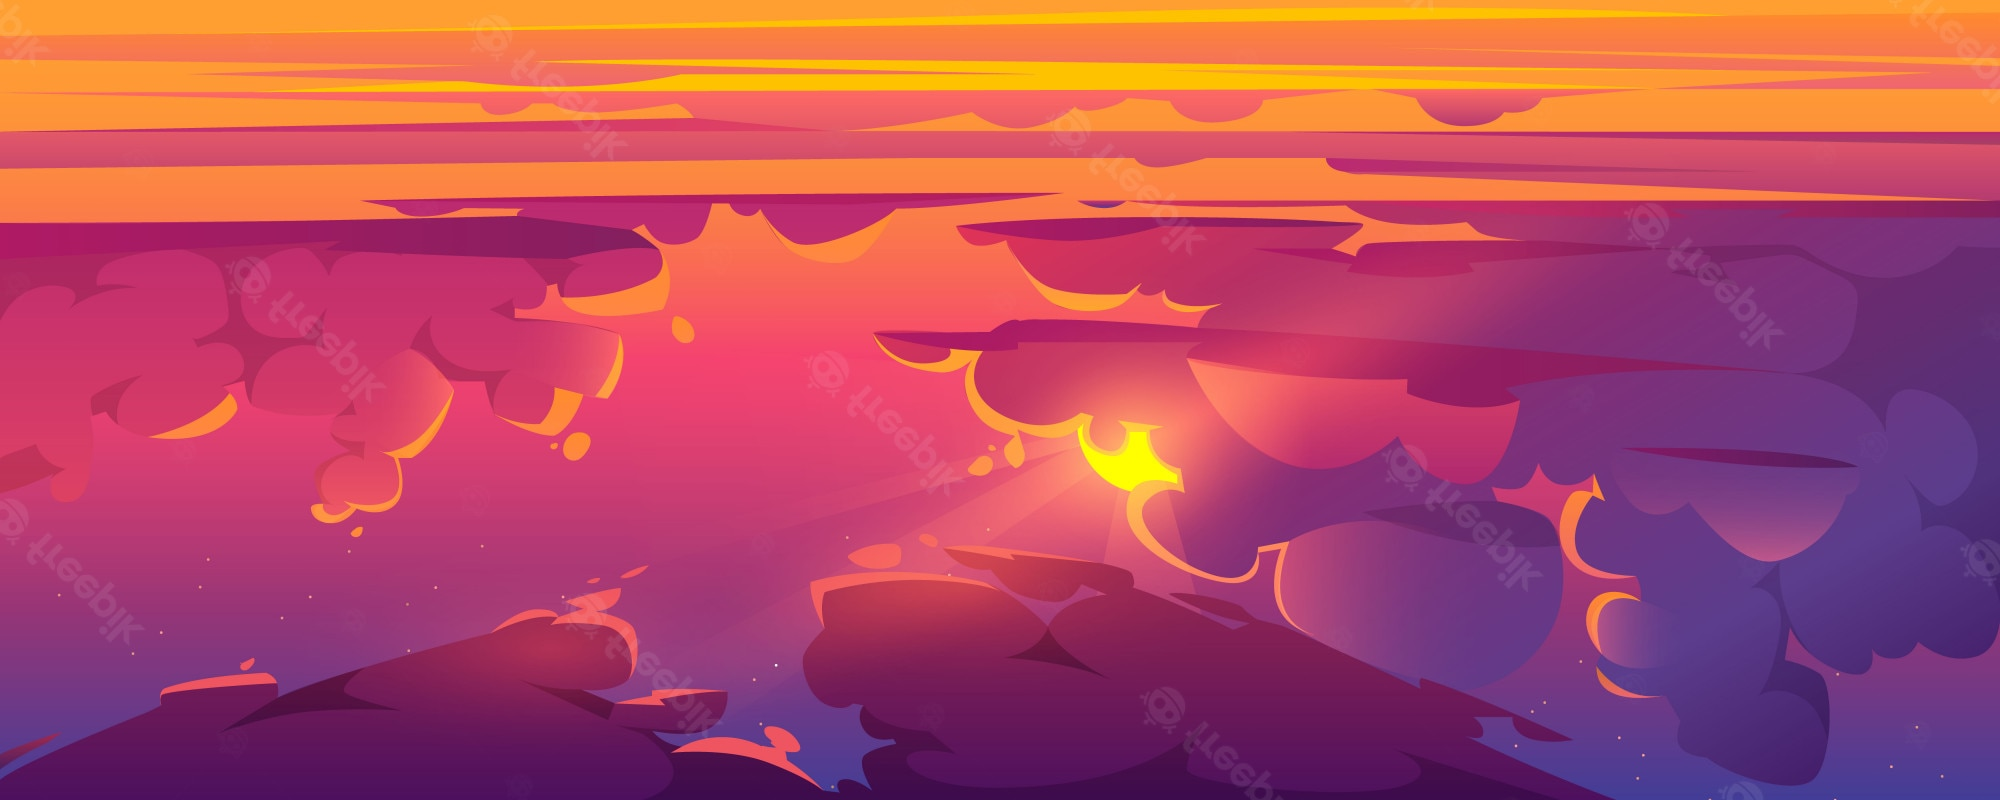

In [131]:
#IMAGE FLIP
im1.transpose(Image.FLIP_LEFT_RIGHT)
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [132]:
sky = download_img("https://images.pexels.com/photos/53594/blue-clouds-day-fluffy-53594.jpeg?cs=srgb&dl=pexels-pixabay-53594.jpg&fm=jpg")
sky.save('sky.png')

In [133]:
lama = download_img("https://cdn1.vectorstock.com/i/1000x1000/38/80/today-is-a-good-day-vector-21113880.jpg")
lama.save("lama.png")

In [134]:
print('Sky image resolution', sky.size)
print('sky format:' , sky.format)
print('lama image resolution' , lama.size)
print('lama format: ', lama.format)

Sky image resolution (3072, 2304)
sky format: JPEG
lama image resolution (1000, 1080)
lama format:  JPEG


In [135]:
#blending images
def blend_image(image_1 , image_2 , mode = 'RGB' , size = (1000,1000), alpha = 0.8):
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    image_1 = image_1.convert(mode)
    image_2 = image_2.convert(mode)
    image_1 = image_1.convert('RGBA')
    image_2 = image_2.convert('RGBA')
    blended_image = Image.blend(image_1 , image_2 , alpha)
    return blended_image

In [136]:
blend_image(sky , lama , alpha = 0.8 , size=(1000,1000)).show()
blend_image(sky , lama , alpha = 0.8 , size=(1000,1000)).save('greeting.png')

In [137]:
im1.size


(2000, 800)

In [138]:
icon = Image.open(r"C:\Users\asus\Pictures\428724_f450b216fdf449188addd8df217327fa_mv2.png")


In [161]:
icon = icon.resize([100,100])

In [162]:
im2 = im2.convert('RGBA')
im2.paste(icon , (0,0))
im2.show()

In [158]:
im2.paste(icon , (200,200))
im2.show()

In [159]:
def add_watermark(image, watermark , style = None , pos = (0,0)):
    image = image.convert('RGBA')    #convert image to RGBA 
    watermark = watermark.convert('RGBA')  #convert watermark to RGBA
    if style == 'tile':
        for x in range(0 , image.width , watermark.width):
            for y in range(0, image.height, watermark.width):
                image.paste(watermark, (x,y) , mask = watermark)
    elif style is None:
        image.paste(watermark, pos , mask = watermark)
    return image
                

In [165]:
add_watermark(im2 , icon , pos = (im2.width-200 ,im2.height-200)).show()

In [163]:
im2.width

1296

In [166]:
from PIL import ImageFilter

In [172]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR , 
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(7),
    ImageFilter.ModeFilter(3),
    ImageFilter.RankFilter(3,3),
]

for i ,filter in enumerate(filters):
    sky.filter(filter).save(f'sky_{i}.png')